<a href="https://colab.research.google.com/github/hawaldarruhaan/GOLD_PRICE_PREDICTION/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/gld_price_data.csv")

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
df.shape


(2290, 6)

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
X = df.drop(['Date','GLD'], axis=1)

In [ ]:
Y = df['GLD']

In [ ]:
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


train test split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model loading and training


In [ ]:
random_Forest_model = RandomForestRegressor(n_estimators=100)

In [ ]:
random_Forest_model.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction for test data
test_data_prediction = random_Forest_model.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.44659902  81.81339995 115.90610005 127.67150084 120.72260158
 154.61629743 150.47179867 126.049      117.44469881 126.11390051
 116.83760126 172.70270066 141.83419866 167.88219873 115.25719995
 117.41450033 138.78550278 170.08780125 160.06730324 158.50990008
 155.23460047 125.16570028 175.57079962 157.41030351 125.22380058
  93.70699957  77.08820018 120.53639974 119.19619993 167.43509973
  88.18620074 125.17389995  91.00270063 117.70110034 121.06949904
 135.89530022 115.44750101 115.45800024 146.05670013 107.24420139
 104.74290255  87.21349796 126.53630044 117.94450005 151.87959917
 119.6332001  108.2886003  108.20649837  93.04510043 127.16459759
  74.63570048 113.66379912 121.49780045 111.1739991  118.83119906
 121.08279936 160.00730017 169.06370134 147.09939635  85.87749843
  94.45150045  86.8357984   90.59090001 118.92530091 126.44070085
 127.60470001 169.81449945 122.25629952 117.43079875  98.35710011
 167.9521019  142.73199793 132.25880227 121.18560205 121.61989927
 119.77870

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9887585087189406


Comapre the actual value and predicted value

In [ ]:
Y_test = list(Y_test)

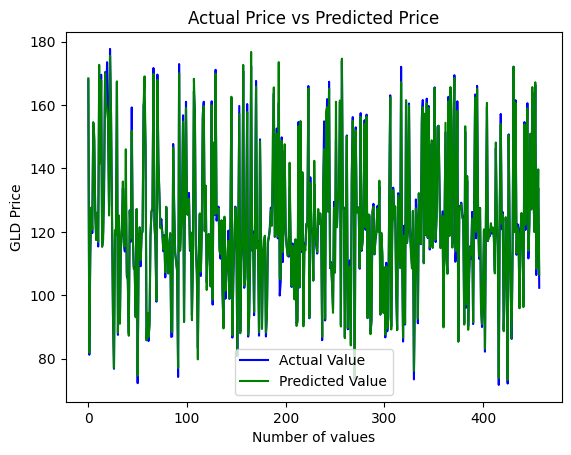

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Prediction System

In [ ]:
# input_data = (1447.160034	,	78.470001	,15.180	,1.471692)

# input_data_as_numpy_array = np.asarray(input_data)

# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = random_Forest_model.predict(input_data_reshaped)
# print("predicted gold price",prediction)

input_data_df = pd.DataFrame([(1447.160034	,	78.470001	,15.180	,1.471692)], columns=X.columns)

prediction = random_Forest_model.predict(input_data_df)

print("predicted gold price",prediction)

predicted gold price [85.02840025]


In [ ]:
import pickle
pickle.dump(random_Forest_model,open('model.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('model.pkl','rb'))

In [ ]:
input_data_df = pd.DataFrame([(1447.160034	,	78.470001	,15.180	,1.471692)], columns=X.columns)

prediction = random_Forest_model.predict(input_data_df)

print("predicted gold price",prediction)

predicted gold price [85.02840025]
